Clustering: Hierarchical 
Dataset: Cities_r2.csv 
Apply Data pre-processing (Label Encoding , Data 
Transformation….) techniques if necessary. 
Apply Hierarchical clustering algorithms (based on 
effective_literacy_rate_total column) to find the group of customers

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Load the dataset
data = pd.read_csv('cities_r2.csv')

# Preview the dataset
data.head()


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [28]:
# Check for missing values
print(data.isnull().sum())
# Drop or fill missing values if necessary
data = data.dropna()


name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64


In [29]:
# Standardize the 'effective_literacy_rate_total' column
scaler = StandardScaler()
data['effective_literacy_rate_scaled'] = scaler.fit_transform(data[['effective_literacy_rate_total']])


In [30]:
# Prepare data for clustering
X = data[['effective_literacy_rate_scaled']]

# Perform hierarchical clustering
linked = linkage(X, method='ward')


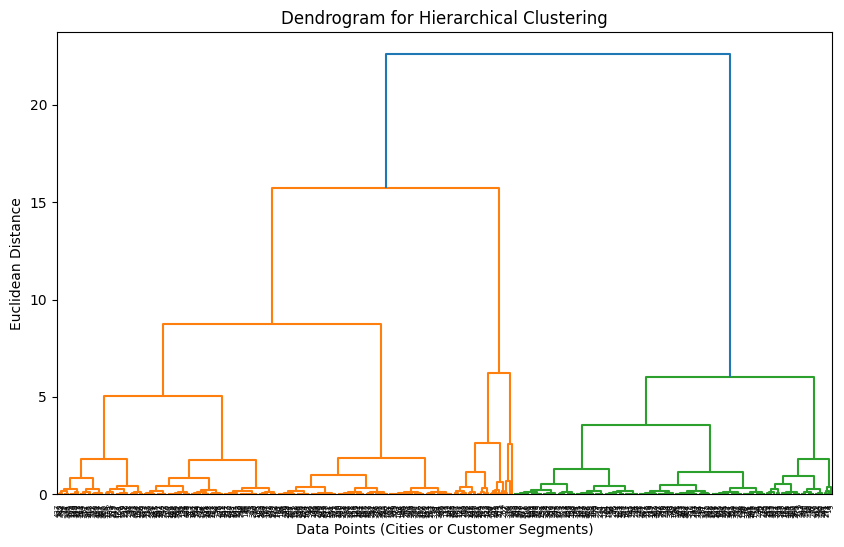

In [31]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points (Cities or Customer Segments)")
plt.ylabel("Euclidean Distance")
plt.show()


In [34]:

# Set the cutoff distance or number of clusters
clusters = fcluster(linked, t=3, criterion='maxclust')  # t=3 creates 3 clusters; adjust as needed
data['cluster'] = clusters

# Display the cluster assignment
print(data[['effective_literacy_rate_total', 'cluster']])


     effective_literacy_rate_total  cluster
0                            79.86        3
1                            91.99        1
2                            80.51        3
3                            83.46        3
4                            68.38        2
..                             ...      ...
488                          81.85        3
489                          84.16        3
490                          94.05        1
491                          85.91        3
492                          91.81        1

[493 rows x 2 columns]


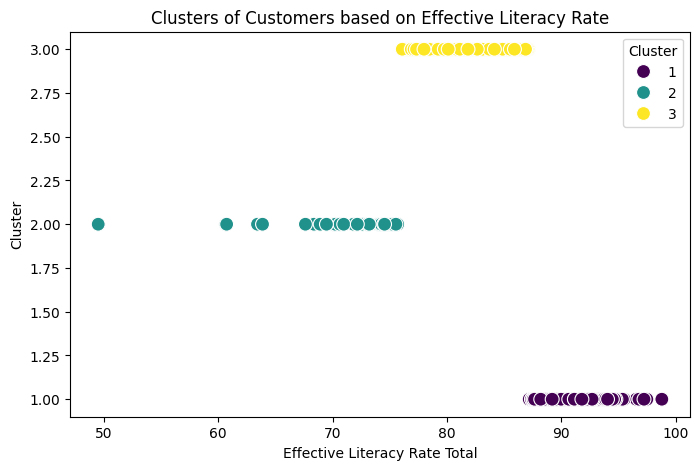

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='effective_literacy_rate_total', y='cluster', hue='cluster', palette='viridis', s=100)
plt.title("Clusters of Customers based on Effective Literacy Rate")
plt.xlabel("Effective Literacy Rate Total")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()
